# Objective

__Scenerio:__

       PR firm, ExoPublic, has noticed the immense success generated through popular social media app - Tiktok. In 2023, the social media app has over 1.53 billion users, with over 1 billion videos watched daily (1). Celebrities, politicians, social media influencers, and most notibly, average, everyday people, have all been able to successfuly generate support for and/or promote their agenda through Tiktok. 
       ExoPublic wants to fill their client's audience gap by begining to direct their clients to generate a presence on Tiktok. However, the firm has limited knowledge of the app and does not know how to guide clients or what constitutes Tiktok success.
       ExoPublic has asked for the help of data scientist to determine how to generate success on Tiktok. The objective of the analysis of the dataset "Top 1000 Tiktokers all over the world" is to determine drivers and models for success on Tiktok. 
       
    1 https://www.demandsage.com/tiktok-user-statistics/

# Imports

In [1]:
# standard imports
import numpy as np
import pandas as pd
# train, test, split
from sklearn.model_selection import train_test_split
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# notebook formatting
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

# Acquire

    My acquired data set is named "Top 1000 Tiktokers all over the world". The csv file was downloaded from kaggle:
https://www.kaggle.com/datasets/syedjaferk/top-1000-tiktokers

    The data was published to kaggle by user Syed Jafer using collection method - scrapping and source - internet. No date is available.

__Data Dictionary:__

    Rank - Overall rank based on followers and popularity

    Username - handle used in tiktok.
    
    Tiktok Link - Url for the user.
        dropped

    Name: Account Name

    Subscribers Count: No of subscribers/followers
        renamed: subscribers

    Views. Avg: Avg Views of the content.
        renamed: views

    Likes Avg: Average likes
        renamed: likes

    Comments. Avg: Average Comments
        renamed: comments
    
    Shares. Avg: Average Shares
        renamed: shares

In [2]:
df = pd.read_csv('top_1000_tiktokers.csv')
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


In [3]:
# summarize data/ inital glace at data
print('_'*50)
print(f'Shape: \n{df.shape}')
print('_'*50)
print(f'Stats: \n{df.describe().T}')
print('_'*50)
print('Info: ')
print(df.info())
print('_'*50)
print(f'Data Types: \n{df.dtypes}')
print('_'*50)
print(f'Null Values: \n{df.isnull().sum()}')
print('_'*50)
print(f'NA Values: \n{df.isna().sum()}')
print('_'*50)
print(f'Unique Value Count: \n{df.nunique()}')
print('_'*50)
print(f'Columns: \n{df.columns}')
print('_'*50)
print(f'Column Value Counts: \n{df.columns.value_counts(dropna=False)}')
print('_'*50)

__________________________________________________
Shape: 
(1000, 9)
__________________________________________________
Stats: 
       count   mean         std  min     25%    50%     75%     max
Rank  1000.0  500.5  288.819436  1.0  250.75  500.5  750.25  1000.0
__________________________________________________
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               1000 non-null   int64 
 1   Username           1000 non-null   object
 2   Tiktok Link        1000 non-null   object
 3   Name               998 non-null    object
 4   Subscribers Count  1000 non-null   object
 5   Views. Avg         1000 non-null   object
 6   Likes. Avg         1000 non-null   object
 7   Comments. Avg      1000 non-null   object
 8   Shares. Avg        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
None


In [4]:
# drop Tiktok Link using its index - 2
df = df.drop(df.columns[2], axis=1)

In [5]:
# format column names to be all lowercase
# format column names to be in snakecase
# remove . from column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')

In [6]:
# format name to be all lowercase and in snakecase
df.name = df.name.str.lower().str.replace(' ', '_')

In [7]:
# rename columns
df = df.rename(columns={'subscribers_count': 'subscribers'
                   , 'views_avg': 'views'
                   , 'likes_avg': 'likes'
                   , 'comments_avg': 'comments'
                   , 'shares_avg': 'shares'})

In [8]:
# convert subscribers, views, likes, comments, and shares to be numeric
def convert_to_numeric(value):
    if isinstance(value, str):
        if value[-1] == 'M':
            return float(value[:-1]) * 1000000
        elif value[-1] == 'K':
            return float(value[:-1]) * 1000
        else:
            return float(value)
    else:
        return value
# apply function    
df['subscribers'] = df['subscribers'].apply(convert_to_numeric)
df['views'] = df['views'].apply(convert_to_numeric)
df['likes'] = df['likes'].apply(convert_to_numeric)
df['comments'] = df['comments'].apply(convert_to_numeric)
df['shares'] = df['shares'].apply(convert_to_numeric)

In [9]:
# locate duplicates in username column
print("U S E R   N A M E   D U P L I C A T E S")
print('_'*50)
print(f' \nNumber of duplicates in username: {df.username.duplicated().sum()}')
print('-'*50)
duplicates = df['username'].duplicated()
duplicated_rows = df[duplicates]
print(f' Values with duplicates: \n{duplicated_rows}')
print('-'*50)
print(f' Instances of annajobling duplicates: \n{(df[df["username"] == "annajobling"])}')
print('-'*50)
print(f' Instances of kanebrown duplicates: \n{df[df["username"] == "kanebrown"]}')
print('-'*50)
print(f' Instances of nolaymex duplicates: \n{df[df["username"] == "nolaymex"]}')

U S E R   N A M E   D U P L I C A T E S
__________________________________________________
 
Number of duplicates in username: 3
--------------------------------------------------
 Values with duplicates: 
     rank     username          name  subscribers      views     likes  \
100   101     nolaymex         nolay      91700.0  8400000.0  658000.0   
101   102  annajobling  anna_jobling     581400.0  4700000.0  565400.0   
102   103    kanebrown    kane_brown    4800000.0  2800000.0  462500.0   

     comments   shares  
100    1900.0   3200.0  
101    7100.0   3200.0  
102    8800.0  12800.0  
--------------------------------------------------
 Instances of annajobling duplicates: 
     rank     username          name  subscribers      views     likes  \
98     99  annajobling  anna_jobling     581400.0  4700000.0  565400.0   
101   102  annajobling  anna_jobling     581400.0  4700000.0  565400.0   

     comments  shares  
98     7100.0  3200.0  
101    7100.0  3200.0  
------------

In [10]:
# locate duplicates in name column
print("N A M E   D U P L I C A T E S")
print('_'*50)
print(f' \nNumber of duplicates in name: {df.name.duplicated().sum()}')
print('-'*50)
duplicates = df['name'].duplicated()
duplicated_rows = df[duplicates]
print(f' Values with duplicates: \n{duplicated_rows}')
print('-'*50)
print(f' Instances of nolay duplicates: \n{(df[df["name"] == "nolay"])}')
print('-'*50)
print(f' Instances of anna_jobling duplicates: \n{df[df["name"] == "anna_jobling"]}')
print('-'*50)
print(f' Instances of kane_brown duplicates: \n{df[df["name"] == "kane_brown"]}')
print('-'*50)
print(f' Instances of fernanda duplicates: \n{(df[df["name"] == "fernanda"])}')
print('-'*50)
print(f' Instances of max_taylor duplicates: \n{df[df["name"] == "max_taylor"]}')
print('-'*50)
print(f' Instances of NaN duplicates: \n{df[df["name"] == "NaN"]}')
print('-'*50)
print(f' Instances of tommy duplicates: \n{df[df["name"] == "tommy"]}')
print('-'*50)
print(f' Instances of mikaela_testa duplicates: \n{df[df["name"] == "mikaela_testa"]}')

N A M E   D U P L I C A T E S
__________________________________________________
 
Number of duplicates in name: 8
--------------------------------------------------
 Values with duplicates: 
     rank           username           name  subscribers      views     likes  \
100   101           nolaymex          nolay      91700.0  8400000.0  658000.0   
101   102        annajobling   anna_jobling     581400.0  4700000.0  565400.0   
102   103          kanebrown     kane_brown    4800000.0  2800000.0  462500.0   
191   192      ferchugimenez       fernanda    6500000.0  4900000.0  795000.0   
195   196     maxtaylorlifts     max_taylor    8400000.0  3300000.0  565700.0   
686   687  iloveyourmomscatt            NaN       8200.0  1300000.0  159300.0   
785   786              tsezy          tommy    4800000.0  2000000.0  253500.0   
949   950    simpforatispaul  mikaela_testa    2700000.0  2100000.0  355100.0   

     comments   shares  
100    1900.0   3200.0  
101    7100.0   3200.0  
102

In [11]:
# drop specified duplicates
df = df.drop([100, 101, 102], axis=0)

In [12]:
# boolean mask of null values
nulls = df.name.isnull()
# locate null values
null_loc = df[nulls]
null_loc

,rank,username,name,subscribers,views,likes,comments,shares
490,491,carloandsarah,NaN,3900000.0,3200000.0,279700.0,1100.0,1900.0
686,687,iloveyourmomscatt,NaN,8200.0,1300000.0,159300.0,4900.0,3300.0


In [13]:
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, 'shares')

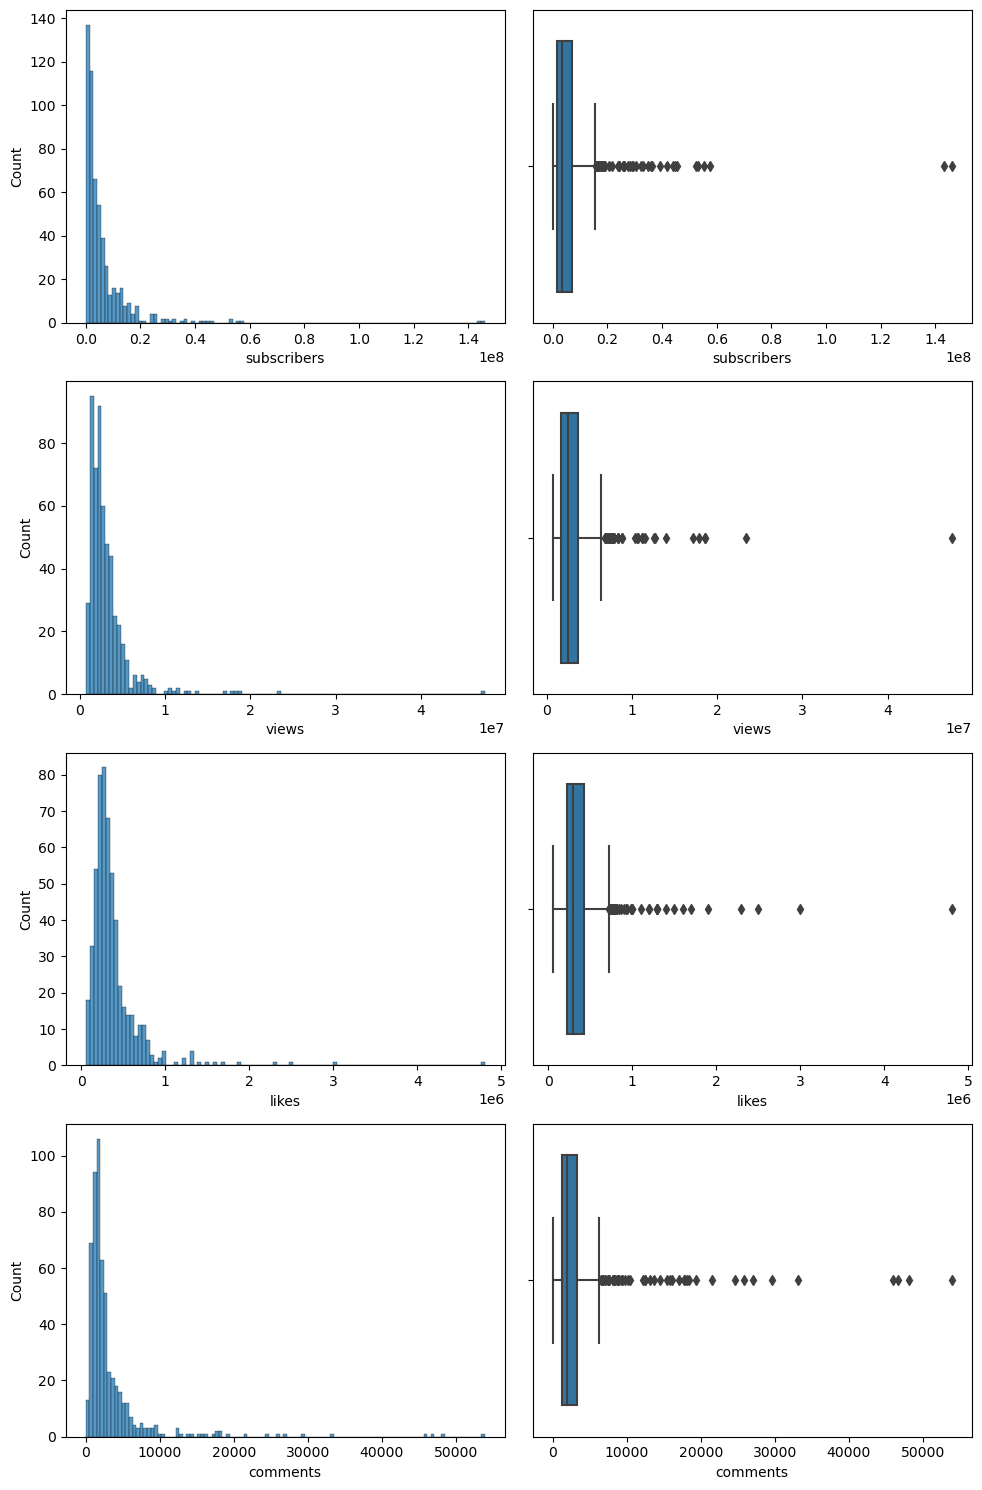

In [14]:
# view variable distributions
plt.figure(figsize=[10,15])
plt.subplot(421)
sns.histplot(X_train.subscribers)
plt.subplot(422)
sns.boxplot(X_train.subscribers)
plt.subplot(423)
sns.histplot(X_train.views)
plt.subplot(424)
sns.boxplot(X_train.views)
plt.subplot(425)
sns.histplot(X_train.likes)
plt.subplot(426)
sns.boxplot(X_train.likes)
plt.subplot(427)
sns.histplot(X_train.comments)
plt.subplot(428)
sns.boxplot(X_train.comments)
plt.tight_layout()
plt.show()

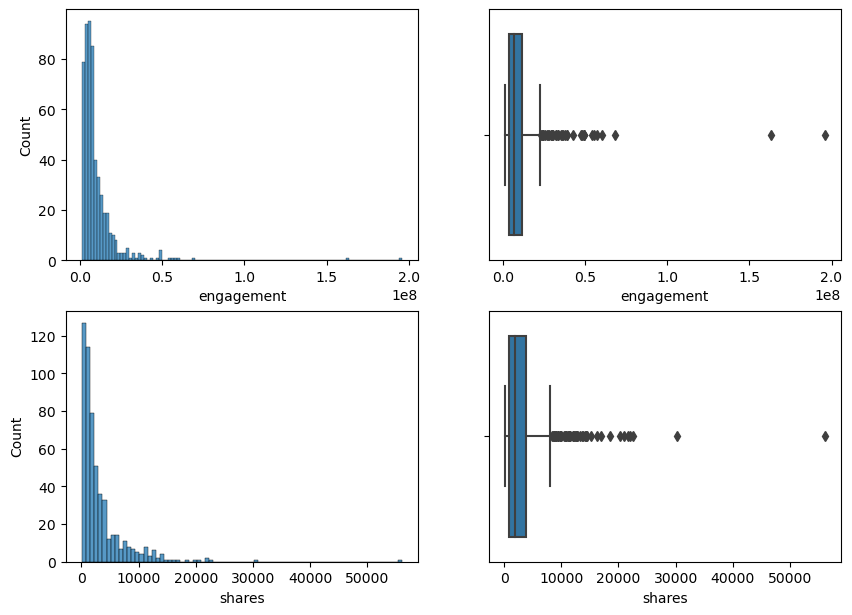

In [37]:
# view variable distribution
plt.figure(figsize=[10,15])
plt.subplot(421)
sns.histplot(X_train.engagement)
plt.subplot(422)
sns.boxplot(X_train.engagement)
plt.subplot(423)
sns.histplot(y_train)
plt.subplot(424)
sns.boxplot(y_train)
plt.show()

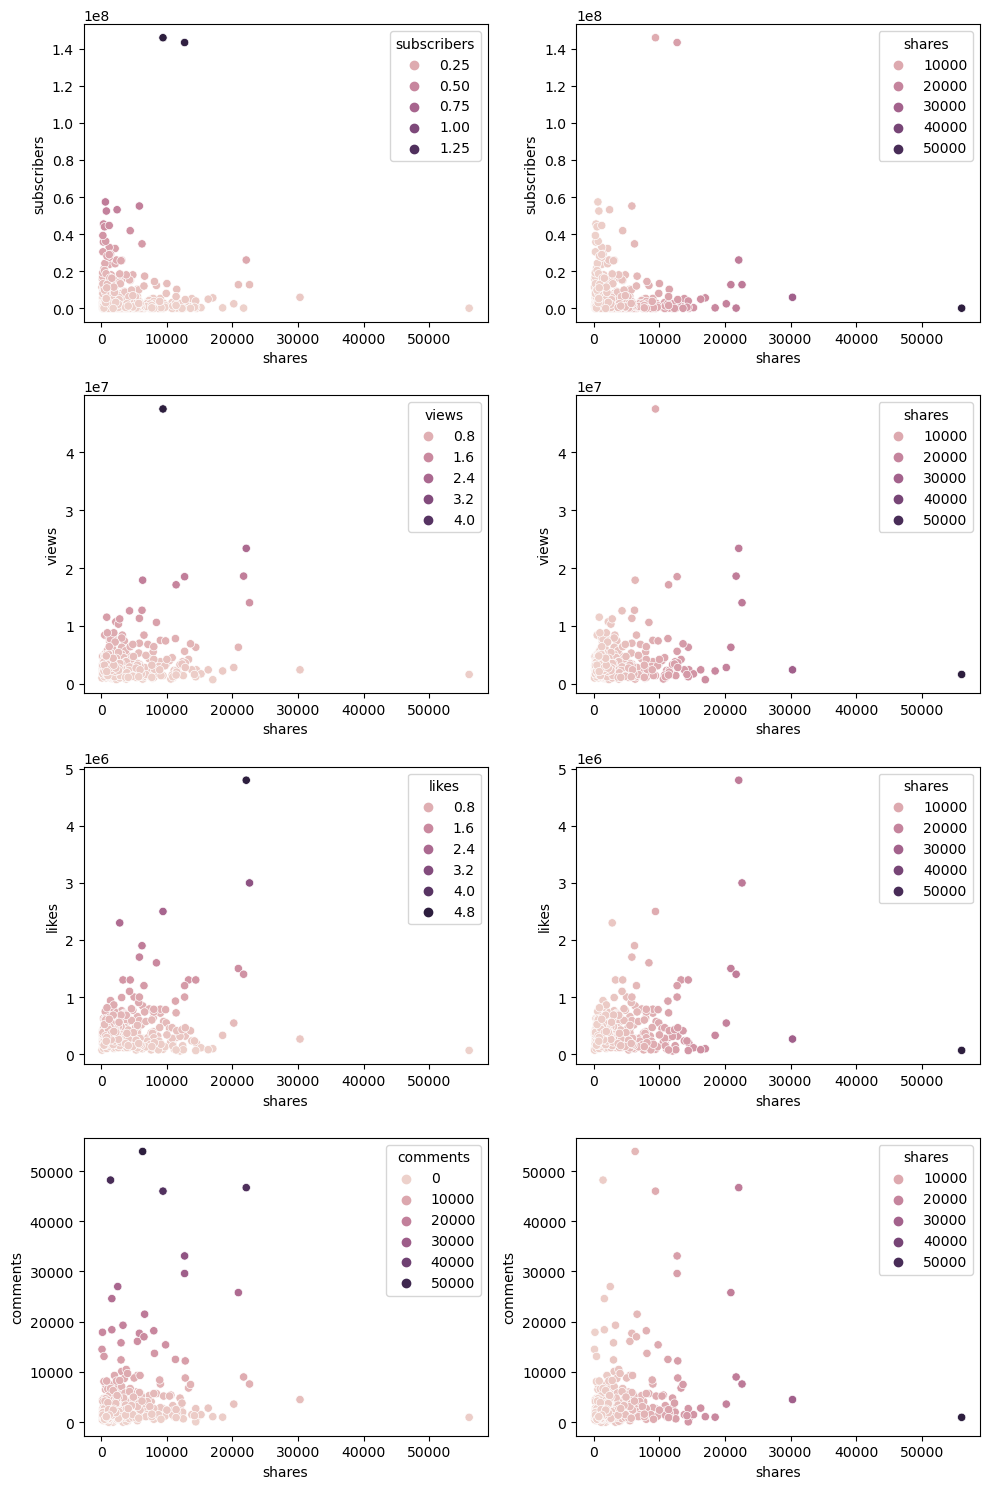

In [40]:
# view X_train variables against y_train
plt.figure(figsize=[10,15])
plt.subplot(421)
sns.scatterplot(y_train, X_train.subscribers, hue=X_train.subscribers)
plt.subplot(422)
sns.scatterplot(y_train, X_train.subscribers, hue=y_train)
plt.subplot(423)
sns.scatterplot(y_train, X_train.views, hue=X_train.views)
plt.subplot(424)
sns.scatterplot(y_train, X_train.views, hue=y_train)
plt.subplot(425)
sns.scatterplot(y_train, X_train.likes, hue=X_train.likes)
plt.subplot(426)
sns.scatterplot(y_train, X_train.likes, hue=y_train)
plt.subplot(427)
sns.scatterplot(y_train, X_train.comments, hue=X_train.comments)
plt.subplot(428)
sns.scatterplot(y_train, X_train.comments, hue=y_train)
plt.tight_layout()
plt.show()

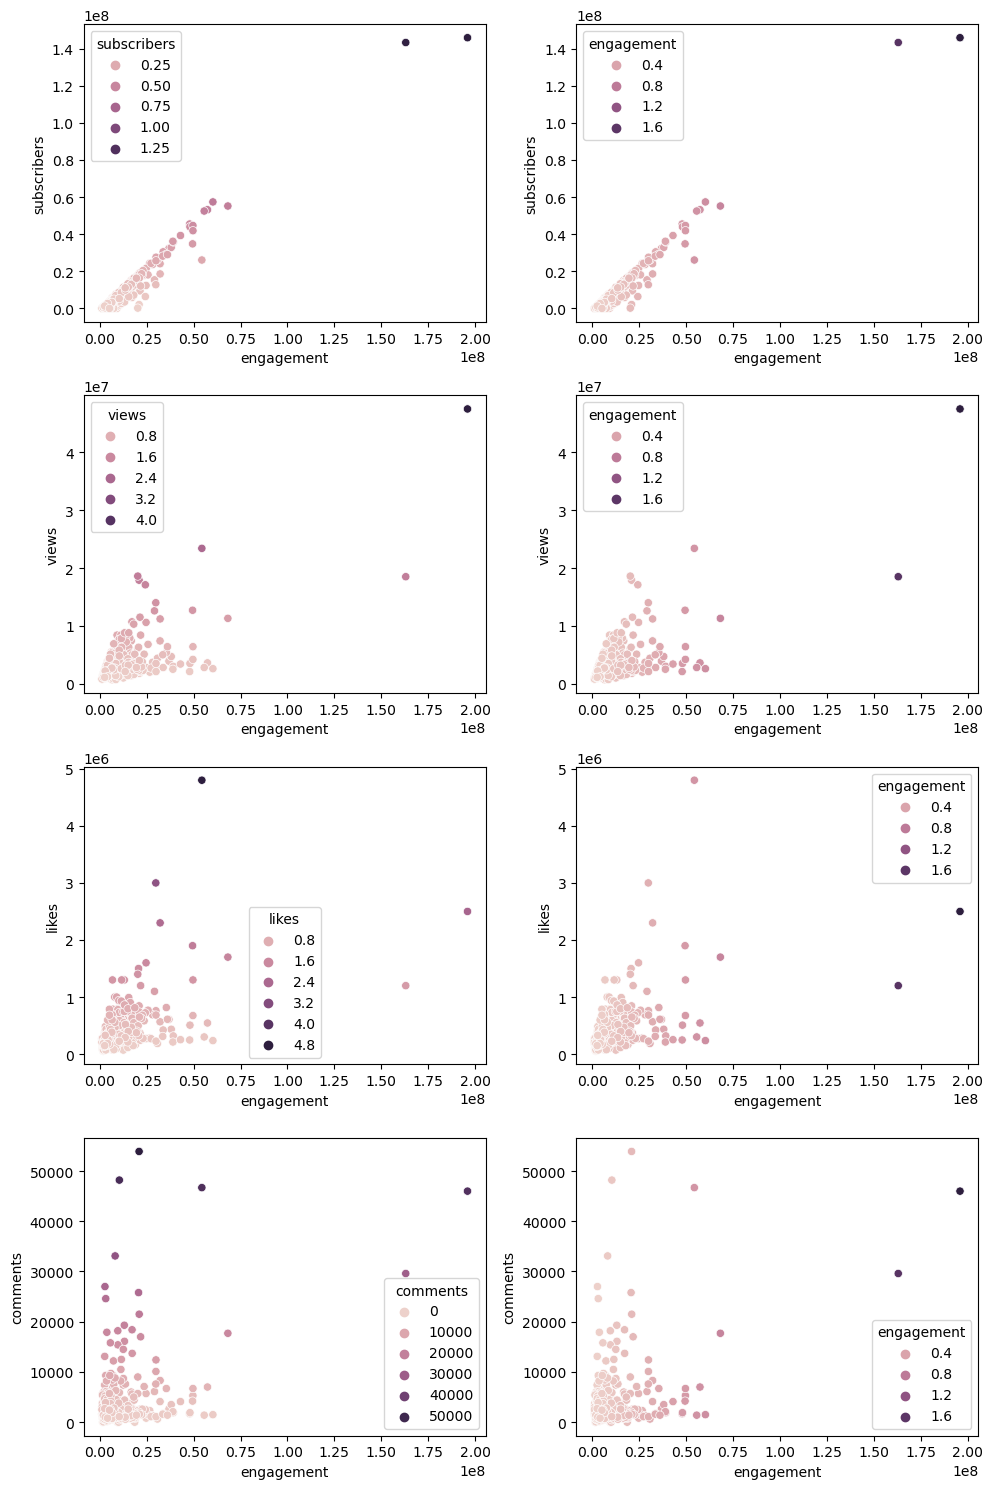

In [43]:
# view X_train variables against X_train.engagement
plt.figure(figsize=[10,15])
plt.subplot(421)
sns.scatterplot(X_train.engagement, X_train.subscribers, hue=X_train.subscribers)
plt.subplot(422)
sns.scatterplot(X_train.engagement, X_train.subscribers, hue=X_train.engagement)
plt.subplot(423)
sns.scatterplot(X_train.engagement, X_train.views, hue=X_train.views)
plt.subplot(424)
sns.scatterplot(X_train.engagement, X_train.views, hue=X_train.engagement)
plt.subplot(425)
sns.scatterplot(X_train.engagement, X_train.likes, hue=X_train.likes)
plt.subplot(426)
sns.scatterplot(X_train.engagement, X_train.likes, hue=X_train.engagement)
plt.subplot(427)
sns.scatterplot(X_train.engagement, X_train.comments, hue=X_train.comments)
plt.subplot(428)
sns.scatterplot(X_train.engagement, X_train.comments, hue=X_train.engagement)
plt.tight_layout()
plt.show()

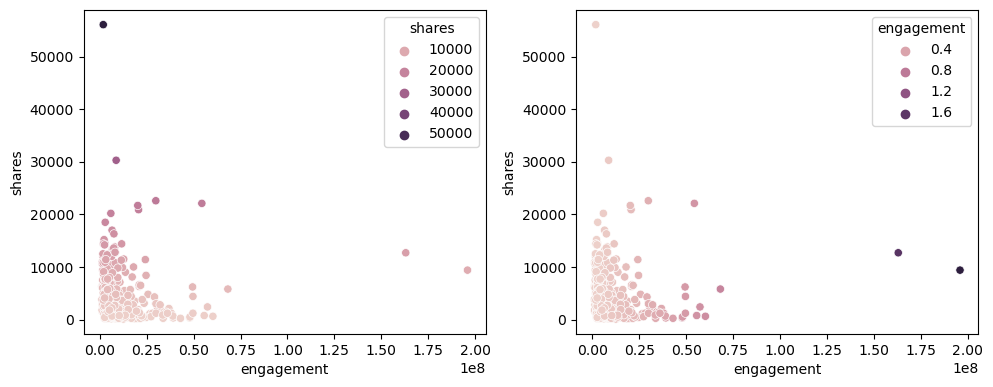

In [45]:
# view y_train variables against X_train.engagement
plt.figure(figsize=[10,15])
plt.subplot(421)
sns.scatterplot(X_train.engagement, y_train, hue=y_train)
plt.subplot(422)
sns.scatterplot(X_train.engagement, y_train, hue=X_train.engagement)
plt.tight_layout()
plt.show()

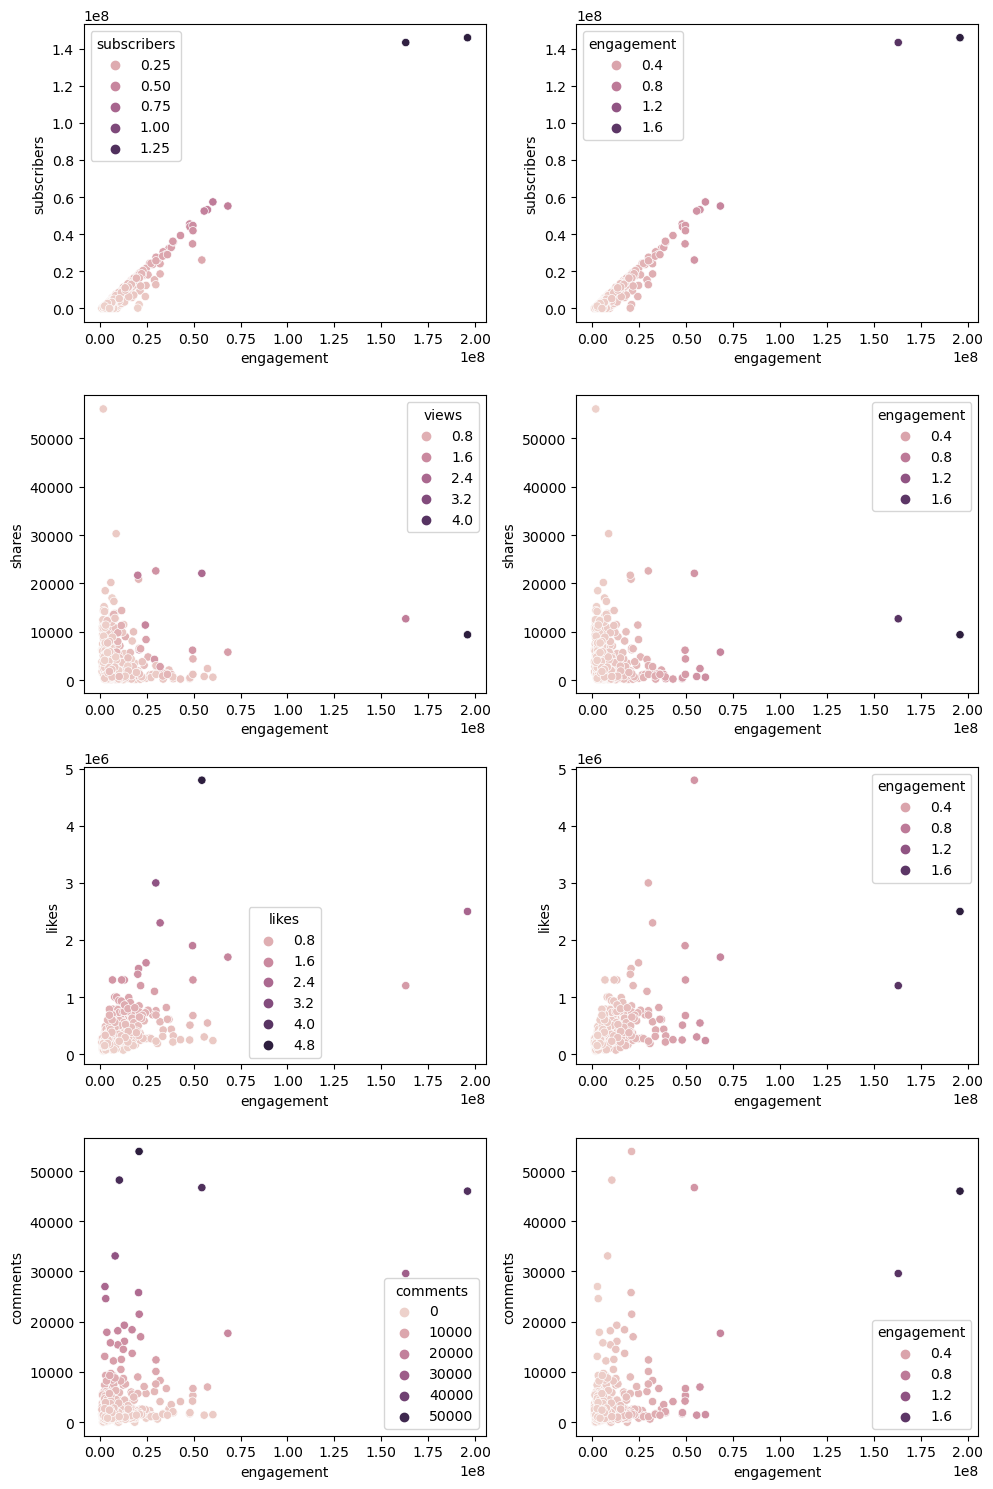

In [53]:
# view X_train variables against X_train.engagement
plt.figure(figsize=[10,15])
plt.subplot(421)
sns.scatterplot(engagement.engagement, engagement.subscribers, hue=X_train.subscribers)
plt.subplot(422)
sns.scatterplot(engagement.engagement, engagement.subscribers, hue=X_train.engagement)
plt.subplot(423)
sns.scatterplot(engagement.engagement, engagement.shares, hue=X_train.views)
plt.subplot(424)
sns.scatterplot(engagement.engagement, engagement.shares, hue=X_train.engagement)
plt.subplot(425)
sns.scatterplot(engagement.engagement, engagement.likes, hue=X_train.likes)
plt.subplot(426)
sns.scatterplot(engagement.engagement, engagement.likes, hue=X_train.engagement)
plt.subplot(427)
sns.scatterplot(engagement.engagement, engagement.comments, hue=X_train.comments)
plt.subplot(428)
sns.scatterplot(engagement.engagement, engagement.comments, hue=X_train.engagement)
plt.tight_layout()
plt.show()

In [26]:
# create data table of user engagement
# the table will include subscribers, views, likes, and comments
engagement = X_train.drop(X_train.columns[0], axis=1)
engagement = engagement.drop(X_train.columns[1], axis=1)
engagement = engagement.drop(X_train.columns[2], axis=1)

In [33]:
# create column with the sum of the x variables for each row
engagement['engagement'] = engagement['subscribers'] + engagement['views'] + engagement['likes'] + engagement['comments']

In [35]:
# add total engagement to train
X_train['engagement'] = engagement['engagement']

In [48]:
# drop views from engagement
engagement = engagement.drop(engagement.columns[1], axis=1)

In [50]:
# add shares to engagement
engagement['shares'] = y_train

In [51]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 911 to 607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subscribers  557 non-null    float64
 1   likes        557 non-null    float64
 2   comments     557 non-null    float64
 3   engagement   557 non-null    float64
 4   shares       557 non-null    float64
dtypes: float64(5)
memory usage: 26.1 KB
